# Web Scrapping

install Beautiful Soup

In [1]:
pip install bs4

Using legacy setup.py install for bs4, since package 'wheel' is not installed.
    Running setup.py install for bs4: started
    Running setup.py install for bs4: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


imoprt the necessary library and modules

In [1]:
import bs4
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup

In [2]:
my_url="http://dataquestio.github.io/web-scraping-pages/simple.html"
uClient=uReq(my_url)
page_html=uClient.read()
uClient.close()
print(page_html)

b'<!DOCTYPE html>\n<html>\n    <head>\n        <title>A simple example page</title>\n    </head>\n    <body>\n        <p>Here is some simple content for this page.</p>\n    </body>\n</html>'


In [3]:
soup(page_html, "html.parser")

<!DOCTYPE html>

<html>
<head>
<title>A simple example page</title>
</head>
<body>
<p>Here is some simple content for this page.</p>
</body>
</html>

In [4]:
page_soup=soup(page_html, "html.parser")
page_soup.find('title')

<title>A simple example page</title>

In [5]:
my_url='https://covidindia.org/'
uClient=uReq(my_url)
page_html=uClient.read()
uClient.close()

In [6]:
page_soup=soup(page_html, "html.parser")
page_soup.find_all('a')


[<a class="screen-reader-text skip-link" href="#content" title="Skip to content">Skip to content</a>,
 <a href="tel:+91-11-23978046" rel="noopener noreferrer" target="_blank"><span style="color: #b9209a;">+91-11-23978046</span></a>,
 <a href="tel:1075" rel="noopener"><span style="color: #b9209a;">1075</span></a>,
 <a href="https://covidindia.org/"><img alt="" class="image wp-image-2853 attachment-full size-full" height="35" src="https://covidindia.org/wp-content/uploads/2020/05/COVIDIndia.org-New-Logo.png" style="max-width: 100%; height: auto;" width="290"/></a>,
 <a href="#">Current Situation<span class="dropdown-menu-toggle" role="presentation"></span></a>,
 <a aria-current="page" href="https://covidindia.org/">India</a>,
 <a href="https://covidindia.org/state-wise-covid-info/">State-Wise COVID Info</a>,
 <a href="https://covidindia.org/travel-guidelines-for-entry-of-people-by-states/">Travel Alert</a>,
 <a href="https://covidindia.org/current-rules-and-regulations/">Current Rules An

In [7]:
page_soup.find_all('div',{'class':'elementor-section-wrap'})

[<div class="elementor-section-wrap">
 <section class="elementor-element elementor-element-25c11d0 elementor-section-boxed elementor-section-height-default elementor-section-height-default elementor-section elementor-top-section" data-element_type="section" data-id="25c11d0">
 <div class="elementor-container elementor-column-gap-default">
 <div class="elementor-row">
 <div class="elementor-element elementor-element-5e8d0d1 elementor-column elementor-col-100 elementor-top-column" data-element_type="column" data-id="5e8d0d1">
 <div class="elementor-column-wrap elementor-element-populated">
 <div class="elementor-widget-wrap">
 <div class="elementor-element elementor-element-0de440e elementor-widget elementor-widget-html" data-element_type="widget" data-id="0de440e" data-widget_type="html.default">
 <div class="elementor-widget-container">
 <style>
 .shine,
 .chrome {
   font-size: 20px;
   margin: 0 auto;
   margin-bottom: 1em;
   font-weight: bold;
 }
 @media only screen and (max-width:

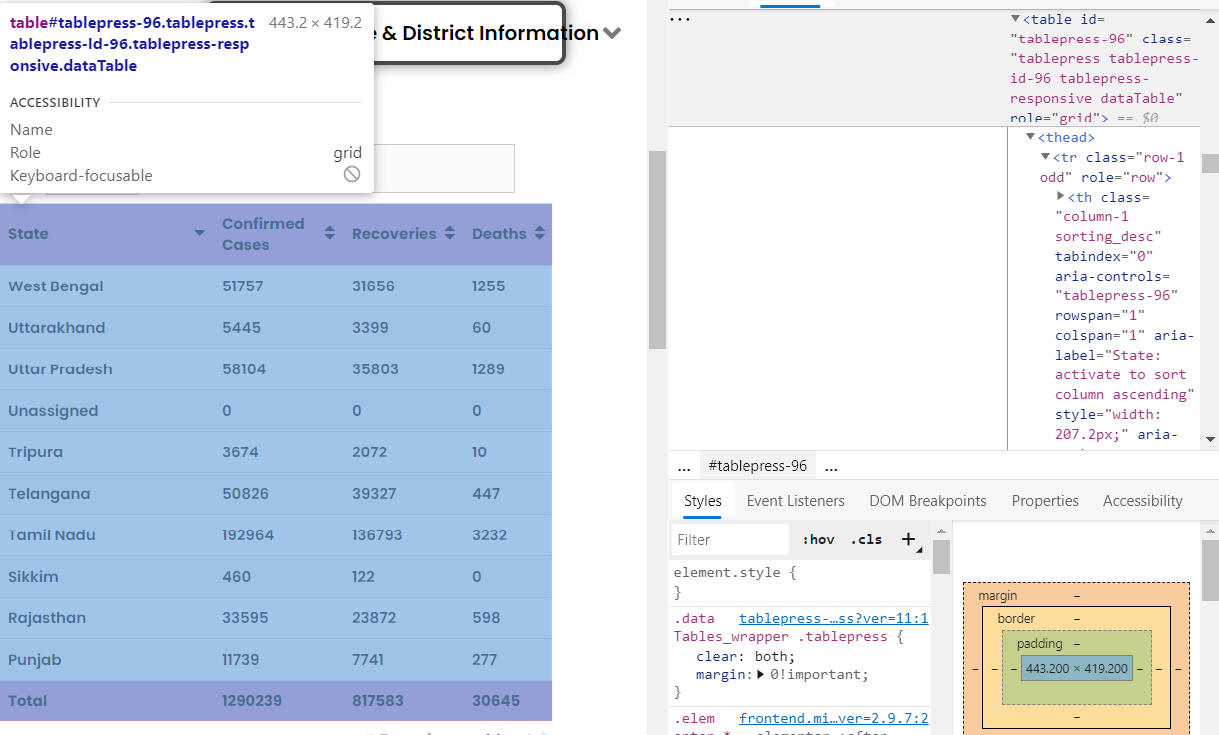

In [9]:
table = page_soup.find('table', attrs={'id':'tablepress-96'})
table_body = table.find('tbody')
rows = table_body.find_all('tr')
print(len(rows))
print(rows)
#rows[0]
    

37
[<tr class="row-2 even">
<td class="column-1">Andaman and Nicobar Islands</td><td class="column-2">259</td><td class="column-3">174</td><td class="column-4">0</td>
</tr>, <tr class="row-3 odd">
<td class="column-1">Andhra Pradesh</td><td class="column-2">80858</td><td class="column-3">39935</td><td class="column-4">933</td>
</tr>, <tr class="row-4 even">
<td class="column-1">Arunachal Pradesh</td><td class="column-2">1056</td><td class="column-3">392</td><td class="column-4">3</td>
</tr>, <tr class="row-5 odd">
<td class="column-1">Assam</td><td class="column-2">29921</td><td class="column-3">21762</td><td class="column-4">76</td>
</tr>, <tr class="row-6 even">
<td class="column-1">Bihar</td><td class="column-2">33511</td><td class="column-3">22832</td><td class="column-4">221</td>
</tr>, <tr class="row-7 odd">
<td class="column-1">Chandigarh</td><td class="column-2">823</td><td class="column-3">535</td><td class="column-4">13</td>
</tr>, <tr class="row-8 even">
<td class="column-1"

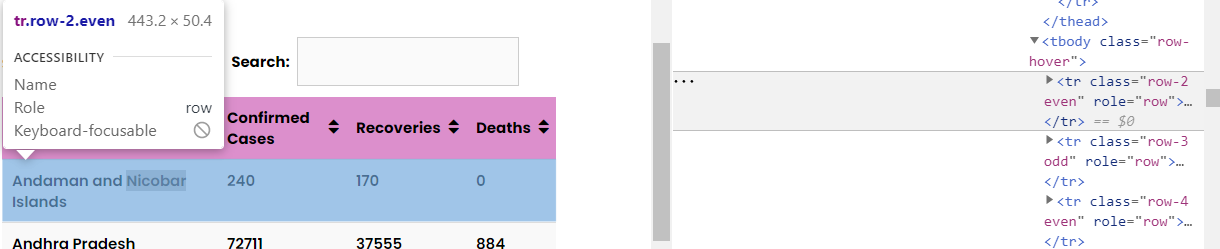

In [10]:
rows[0]

<tr class="row-2 even">
<td class="column-1">Andaman and Nicobar Islands</td><td class="column-2">259</td><td class="column-3">174</td><td class="column-4">0</td>
</tr>

In [11]:
rows[0].td.text.strip()


'Andaman and Nicobar Islands'

In [12]:
cols = rows[0].find_all('td')

In [13]:
len(cols)

4

In [14]:
for i in cols:
    print(i)

<td class="column-1">Andaman and Nicobar Islands</td>
<td class="column-2">259</td>
<td class="column-3">174</td>
<td class="column-4">0</td>


In [15]:
for i in cols:
    print(i.text.strip())

Andaman and Nicobar Islands
259
174
0


In [19]:
fname='covid.csv'
fobj=open(fname,'w')
fobj.write("state,conf_cases,Reco,Death"+"\n")
for row in rows:
    cols = row.find_all('td')
    value = [ele.text.strip() for ele in cols]
    print(value)
    fobj.write(str(value)+"\n")
fobj.close()
    
    

['Andaman and Nicobar Islands', '259', '174', '0']
['Andhra Pradesh', '80858', '39935', '933']
['Arunachal Pradesh', '1056', '392', '3']
['Assam', '29921', '21762', '76']
['Bihar', '33511', '22832', '221']
['Chandigarh', '823', '535', '13']
['Chhattisgarh', '6819', '4567', '36']
['Dadar & Nagar Haveli; Daman & Diu', '815', '526', '2']
['Delhi', '128399', '110931', '3777']
['Goa', '4540', '2865', '29']
['Gujarat', '53545', '38849', '2278']
['Haryana', '29755', '22953', '382']
['Himachal Pradesh', '1954', '1145', '11']
['Jammu and Kashmir', '16782', '9217', '296']
['Jharkhand', '7564', '3354', '76']
['Karnataka', '85870', '31347', '1724']
['Kerala', '16995', '7562', '54']
['Ladakh', '1246', '1035', '2']
['Lakshadweep', '0', '0', '0']
['Madhya Pradesh', '26210', '17866', '791']
['Maharashtra', '357117', '199967', '13132']
['Manipur', '2146', '1491', '0']
['Meghalaya', '588', '87', '5']
['Mizoram', '361', '183', '0']
['Nagaland', '1237', '537', '0']
['Odisha', '22693', '15201', '145']
['Pu

In [20]:
filename='covidindiaData.csv'
fp=open(filename,'w')
headers="state,Confirmed Cases,Recoveries,Deaths"
fp.write(headers+"\n")
for row in rows:
    cols = row.find_all('td')
    state=cols[0].text.strip()
    ConfirmedCases=cols[1].text.strip()
    Recoveries=cols[2].text.strip()
    Deaths=cols[3].text.strip()
    fp.write(state+","+ConfirmedCases+","+Recoveries+","+Deaths+"\n")
fp.close()

In [32]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [33]:
import requests


In [36]:
page = requests.get("https://www.accuweather.com/en/in/vadodara/202439/weather-forecast/202439")
page

<Response [403]>

In [21]:
my_url='https://www.covid19india.org/'
uClient=uReq(my_url)
page_html=uClient.read()
uClient.close()

In [42]:
page_soup=soup(page_html, "html.parser")
rdiv=page_soup.find_all('div')
#hdiv=rdiv.find('div',{'class':'Home'})
#hldiv=hdiv.find_all('div',{'class':'home-left'})
#tfudiv=hldiv.find_all('div',{'class':'table fadeInUp'})
#twdiv=tfudiv.find_all('div',{'class':'table-wrapper'})
print(rdiv)


[<div id="root"></div>]


References
1. https://www.crummy.com/software/BeautifulSoup/
2. https://www.datacamp.com/community/tutorials/web-scraping-using-python
3. https://www.pythonforbeginners.com/beautifulsoup/beautifulsoup-4-python
4. https://stackoverflow.com/questions/23377533/python-beautifulsoup-parsing-table
5. https://www.digitalocean.com/community/tutorials/how-to-scrape-web-pages-with-beautiful-soup-and-python-3#writing-the-data-to-a-csv-file
6. https://www.dataquest.io/blog/web-scraping-tutorial-python/